In [38]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [20]:
#Retrieve the target dataset.
data = fetch_20newsgroups()

In [21]:
#Examine a segment of the data.
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [22]:
#Identify target categories
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

In [ ]:
##2.Choose the models hyperparameters: Convert the content of feach string into a vector of numbers.
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [28]:
##3.Separate the dataset into a feature matrix and target array/vector: (Skip)

In [23]:
##4.Validate Model: Download training  and test data.
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

In [24]:
#Examine a segment of the data.
print(train.data[5])

In [29]:
##5.Fit the model to the data:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [30]:
##6.Evaluate the model on new data:
labels = model.predict(test.data)

In [34]:
##7.Gauge the accuracy of the prediction:
mat = confusion_matrix(test.target, labels)

Text(89.133125, 0.5, 'predicted label')

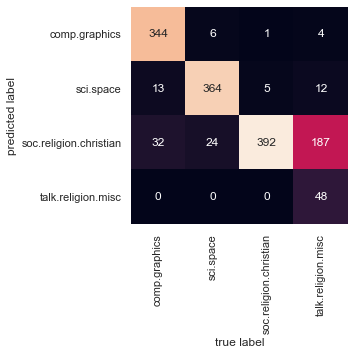

In [39]:
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [40]:
#This function will determine the category fod a given string.
def predict_category(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [41]:
#Test #1
predict_category('sending a payload to the ISS')

'sci.space'

In [42]:
#Test #2
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [44]:
#Test #3
predict_category('determining the screen resolution')